# Aprendizado de Máquina

**Semana 3:** Avaliação de Desempenho Preditivo e Algoritmos de Aprendizado de Máquina

**Tutor:** Fernando Pereira dos Santos

# Introdução

Identificar qual a melhor abordagem para resolver um problema, em termos de complexidade e performance, é imprescindível dentre as muitas opções existentes na literatura. **Devido à grande quantidade de técnicas e combinações possíveis, avaliar e comparar os métodos empregados são de grande importância, tanto com o uso de métricas de performance, quanto em termos de complexidade.** 

Formas de avaliar um algoritmo de aprendizagem de máquina:
- Erro (desempenho preditivo);
- Custo (tempo de processamento e memória necessária);
- Interpretabilidade.

**Qual modelo proporciona a melhor performance?**

**Qual modelo proporciona o menor custo computacional?**

**Qual modelo devo escolher para resolver este problema?**



# No Free Lunch:

- **Não existe um único classificador que possa ser considerado ótimo para todos os problemas**, ou seja, o desempenho elevado em uma classe de problemas é compensado com um mau desempenho em outras classes. 

- Não há um princípio claro para se escolher um método ou um conjunto de métodos de aprendizagem, **raramente se tem um completo conhecimento da distribuição dos dados**, a tarefa de encontrar um bom e único classificador que solucione um determinado problema é muito difícil. 

- Nenhum classificador ou método de aprendizado deve ser preferido em relação a outro.


In [2]:
# carregando os datasets
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine

iris = load_iris()
X_iris = iris.data
Y_iris = iris.target
print("Conjunto de dados IRIS", X_iris.shape)
print("Conjunto de rótulos IRIS", Y_iris.shape)
print("Classes", np.unique(Y_iris))

wines = load_wine()
X_wines = wines.data
Y_wines = wines.target
print("\nConjunto de dados WINES", X_wines.shape)
print("Conjunto de rótulos WINES", Y_wines.shape)
print("Classes", np.unique(Y_wines))

Conjunto de dados IRIS (150, 4)
Conjunto de rótulos IRIS (150,)
Classes [0 1 2]

Conjunto de dados WINES (178, 13)
Conjunto de rótulos WINES (178,)
Classes [0 1 2]


In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

#definição do cross-validation
numeroFolds = 5
kf = KFold(n_splits=numeroFolds, shuffle=True)

#KFoldStratefied -> folds balanceados
#100 exemplos (70 -30)
#cada fold (14 - 6)

#Ideia com conjunto de validação (100 exemplos - 5 folds):
# Tr - Tr - Tr - Va - Te
# Tr - Tr - Va - Te - Tr

# Data Augmentation (gerar dados sintéticos para balancear o conjunto treinamento)

#definição dos classificadores
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC(kernel='linear')
nb = GaussianNB()

#classificação do conjunto IRIS
scores = cross_val_score(knn, X_iris, Y_iris, cv=kf)
print('Acurácia IRIS com K-NN: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))
scores = cross_val_score(svm, X_iris, Y_iris, cv=kf)
print('Acurácia IRIS com SVM: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))
scores = cross_val_score(nb, X_iris, Y_iris, cv=kf)
print('Acurácia IRIS com NB: %0.4f +/- %0.4f\n' % (scores.mean(), scores.std()))

#classificação do conjunto WINES
scores = cross_val_score(knn, X_wines, Y_wines, cv=kf)
print('Acurácia WINES com K-NN: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))
scores = cross_val_score(svm, X_wines, Y_wines, cv=kf)
print('Acurácia WINES com SVM: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))
scores = cross_val_score(nb, X_wines, Y_wines, cv=kf)
print('Acurácia WINES com NB: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

Acurácia IRIS com K-NN: 0.9600 +/- 0.0327
Acurácia IRIS com SVM: 0.9600 +/- 0.0327
Acurácia IRIS com NB: 0.9467 +/- 0.0340

Acurácia WINES com K-NN: 0.7127 +/- 0.0735
Acurácia WINES com SVM: 0.9438 +/- 0.0395
Acurácia WINES com NB: 0.9663 +/- 0.0211


# Ugly Duckling:

O mesmo conceito se aplica para a representação dos atributos de um conjunto de dados: técnicas de extração de características podem ser eficientes para um cenário e nem tanto para outros



#Avaliação e comparação de modelos preditivos:

Fontes de variação entre os classificadores:
- **escolha do conjunto de teste:** diferentes conjuntos de teste podem proporcionar diferentes níveis de performance;
- **escolha do conjunto de treinamento:** definição do conjunto de treinamento pode representar diferentes aprendizados no algoritmo;
- **aleatoriedade interna do algoritmo de treinamento:** inicialização dos pesos nas redes neurais, por exemplo;
- **aleatoriedade do erro de classificação:** variações de resposta devido às regras descritas no algoritmo implementado.

---

Para que a avaliação e comparação entre modelos seja justa é necessário:
- pode-se variar valores de hiperparâmetros para cada modelo;
- todas as execuções devem conter os mesmos dados;
- os mesmos recursos computacionais devem estar disponíveis para todos os modelos;
- a mesma métrica de avaliação deve ser utilizada.

---

A comparação de métodos pode ocorrer considerando técnicas diferentes ou considerando variações de uma mesma técnica:
* **Hold-out**;
* **Cross-validation**; 
  * **Jacknife**;
* **Bootstrap**;
* **Generalização**;





# Generalização e desempenho preditivo:

**Hold-out** (faz um split do conjunto de dados para treinamento e teste):
- altamente dependente da sorte ou azar na definição dos conjuntos de treinamento e testes;
- melhora com o uso de "Random subsampling" (gera-se várias partições aleatórias, em que os exemplos se misturam nas partições).



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(X_iris, Y_iris, test_size=0.5)

svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

predTeste = svm.predict(x_test)
teste_score = accuracy_score(predTeste, y_test)

print("Hold-out com SVM:", teste_score)

Hold-out com SVM: 0.9466666666666667


**Cross-validation** (k folds, sempre deixando um fold para teste e os demais para treinamento):
- os folds são fixos durante todo o experimento;
- considerar a taxa de exemplos classificados corretamente (acurácia, acurácia balanceada, etc);
- média dos erros obtidos em diferentes execuções de um experimento (por exemplo, média da acurácia de 30 execuções);
- temos a possibilidade de incluir um conjunto de validação proveniente do subconjunto de treinamento;
- Execução:
  *   Em verde: partes do conjunto de dados que serão utilizados como conjunto de treinamento;
  *   Em vermelho: parte restante do conjunto de dados que será utilizado como conjunto de teste;
  *   A média das performances indica uma generalização dos resultados.


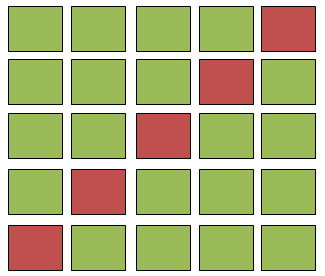

Dados temporais: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

---

**Jacknife** ou **leave-one-out**: k folds, sendo que k é a quantidade de exemplos do dataset.

---

**Bootstrap:** 
- alguns exemplos que estão no conjunto de dados podem não ser selecionados para o treinamento ou para o teste;
- o mesmo objeto pode ser selecionado mais de uma vez para compor o conjunto de treinamento (os que sobrarem formam o conjunto de teste);
- existem diversas heurísticas que atuam para selecionar os exemplos.

https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.cross_validation.Bootstrap.html

---

**Generalização:** a capacidade de generalização de um método é uma das principais estimativas para se escolher um classificador em detrimento de outro, **sendo uma medida de divergência da performance alcançada com os dados de treinamento em relação a um conjunto de dados não vistos** durante este treinamento (testes).

$Generalização = | performanceTR - performanceTE |$

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(X_iris, Y_iris, test_size=0.2)

svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

predTreino = svm.predict(x_train)
predTeste = svm.predict(x_test)

treinamento_score = accuracy_score(predTreino, y_train)
teste_score = accuracy_score(predTeste, y_test)
generalizacao = np.abs(treinamento_score-teste_score)

print("Treinamento score SVM:", treinamento_score)
print("Teste score SVM:", teste_score)
print("Generalização SVM:", generalizacao)

nb = GaussianNB()
nb.fit(x_train, y_train)

predTreino = nb.predict(x_train)
predTeste = nb.predict(x_test)

treinamento_score = accuracy_score(predTreino, y_train)
teste_score = accuracy_score(predTeste, y_test)
generalizacao = np.abs(treinamento_score-teste_score)

print("\nTreinamento score NB:", treinamento_score)
print("Teste score NB:", teste_score)
print("Generalização NB:", generalizacao)

Treinamento score SVM: 0.9833333333333333
Teste score SVM: 0.9333333333333333
Generalização SVM: 0.04999999999999993

Treinamento score NB: 0.975
Teste score NB: 0.9
Generalização NB: 0.07499999999999996


# Considerações finais:

- Em **cenários críticos** qualquer ganho de performance pode compensar a complexidade do custo computacional; assim, o custo computacional é irrelevante à performance;
- Todo o potencial de um modelo está diretamente relacionado aos atributos dos exemplos; **pré-processamento e a escolha adequada de extratores de características tem grande influência na performance dos modelos**;
- Na avaliação da performance, **os classificadores só podem ser comparados justamente** se o conjunto de treinamento, o conjunto de teste e a métrica de performance são exatamente os mesmos.